In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
import time

In [3]:
df = pd.read_csv("/Users/andreatamburri/Documents/GitHub/Default-predictor/dataset.csv", delimiter = ";")
train_df = df[df["default"].notnull()]
print(train_df["default"].mean()) #highly unbalanced

0.014314928425357873


In [118]:
train_df_prep = pd.read_csv("/Users/andreatamburri/Documents/GitHub/Default-predictor/prep_dataset.csv", delimiter = ";")
x_train_df_prep = train_df_prep.drop(["default","uuid"],axis=1)

print(x_train_df_prep.dtypes)

account_amount_added_12_24m            float64
account_days_in_dc_12_24m              float64
account_days_in_rem_12_24m             float64
account_days_in_term_12_24m            float64
account_incoming_debt_vs_paid_0_24m    float64
account_status                         float64
account_worst_status_0_3m              float64
account_worst_status_12_24m            float64
account_worst_status_3_6m              float64
account_worst_status_6_12m             float64
age                                    float64
avg_payment_span_0_12m                 float64
avg_payment_span_0_3m                  float64
merchant_category                      float64
merchant_group                         float64
has_paid                                 int64
max_paid_inv_0_12m                     float64
max_paid_inv_0_24m                     float64
name_in_email                          float64
num_active_div_by_paid_inv_0_12m       float64
num_active_inv                         float64
num_arch_dc_0

In [21]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_train_df_prep)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 89976 samples in 5.525s...
[t-SNE] Computed neighbors for 89976 samples in 47.658s...
[t-SNE] Computed conditional probabilities for sample 1000 / 89976
[t-SNE] Computed conditional probabilities for sample 2000 / 89976
[t-SNE] Computed conditional probabilities for sample 3000 / 89976
[t-SNE] Computed conditional probabilities for sample 4000 / 89976
[t-SNE] Computed conditional probabilities for sample 5000 / 89976
[t-SNE] Computed conditional probabilities for sample 6000 / 89976
[t-SNE] Computed conditional probabilities for sample 7000 / 89976
[t-SNE] Computed conditional probabilities for sample 8000 / 89976
[t-SNE] Computed conditional probabilities for sample 9000 / 89976
[t-SNE] Computed conditional probabilities for sample 10000 / 89976
[t-SNE] Computed conditional probabilities for sample 11000 / 89976
[t-SNE] Computed conditional probabilities for sample 12000 / 89976
[t-SNE] Computed conditional probabilities for s

<ipython-input-28-c398f107c717>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['tsne-2d-one'] = tsne_results[:,0]
<ipython-input-28-c398f107c717>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['tsne-2d-two'] = tsne_results[:,1]


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

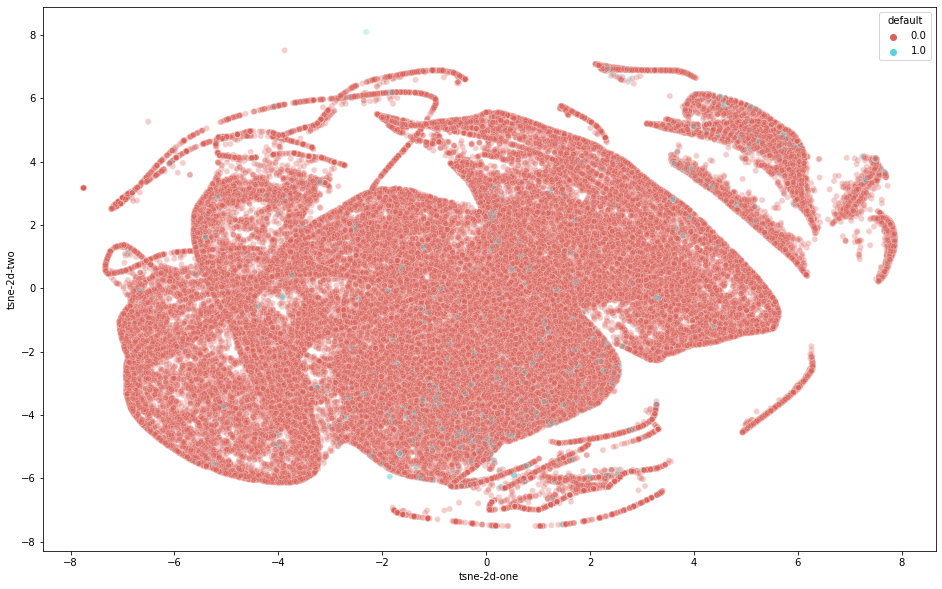

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#it sucks
df_subset = train_df_prep[["default"]]
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="default",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [38]:
#PCA
from sklearn.decomposition import PCA, KernelPCA

df_subset = train_df_prep[["default"]] #[:40000]
x_subset = x_train_df_prep #[:40000]
pca = PCA(n_components=3) #, kernel='poly')
pca_result = pca.fit_transform(x_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.7595096  0.16917686 0.02889439]


<ipython-input-38-947de15a0834>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['pca-one'] = pca_result[:,0]
<ipython-input-38-947de15a0834>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['pca-two'] = pca_result[:,1]
<ipython-input-38-947de15a0834>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

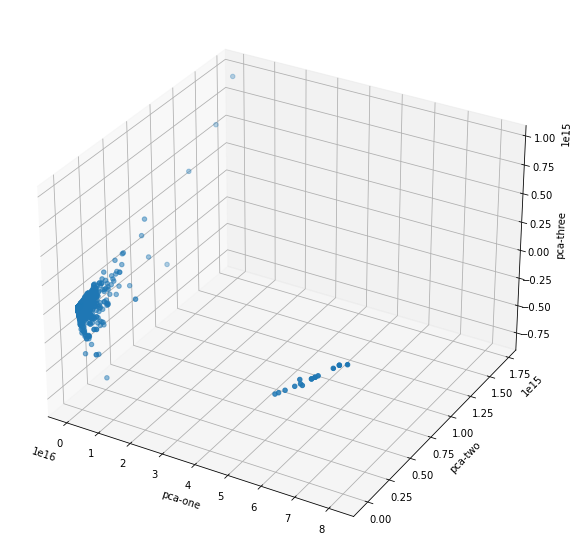

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset["pca-one"], 
    ys=df_subset["pca-two"], 
    zs=df_subset["pca-three"], 
    c=df_subset["default"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00803
Feature: 2, Score: 0.02604
Feature: 3, Score: 0.00482
Feature: 4, Score: -0.00004
Feature: 5, Score: 0.00125
Feature: 6, Score: 0.00201
Feature: 7, Score: 0.00101
Feature: 8, Score: 0.00152
Feature: 9, Score: 0.00139
Feature: 10, Score: -0.02725
Feature: 11, Score: 0.04191
Feature: 12, Score: 0.00466
Feature: 13, Score: 0.01018
Feature: 14, Score: -0.00026
Feature: 15, Score: -0.00022
Feature: 16, Score: -0.00001
Feature: 17, Score: -0.00005
Feature: 18, Score: 0.00094
Feature: 19, Score: 0.00073
Feature: 20, Score: 0.00208
Feature: 21, Score: 0.00165
Feature: 22, Score: 0.00142
Feature: 23, Score: -0.00790
Feature: 24, Score: -0.00797
Feature: 25, Score: 0.00102
Feature: 26, Score: -0.00000
Feature: 27, Score: -0.00000
Feature: 28, Score: 0.00629
Feature: 29, Score: 0.00084
Feature: 30, Score: 0.00042
Feature: 31, Score: 0.00028
Feature: 32, Score: -0.00003
Feature: 33, Score: 0.00067
Feature: 34, Score: 0.00105
Feature: 35, Score:

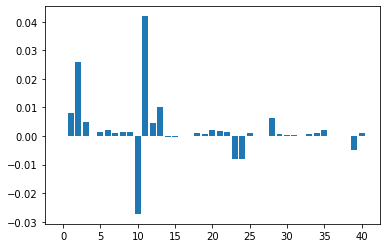

In [74]:
import numpy as np
import pickle

'''most important features:
-account_days_in_dc_12_24m
-account_days_in_rem_12_24m   look at correlation
-account_days_in_term_12_24m
-age age
-avg_payment_span_0_12m
-avg_payment_span_0_3m
-merchant_category
-num_arch_ok_12_24m   look at correlation
-num_arch_ok_0_12m
-status_last_archived_0_24m
-time_hours
'''

model = pickle.load(open("/Users/andreatamburri/Documents/GitHub/Default-predictor/logit_models/default-predictor/ac49e212-f1ea-11eb-bc99-dca904772e07/0.7968324534592942.sav", 'rb'))
# get importance
importance = model.coef_.reshape((-1)).tolist()
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(list(importance)))], importance)
plt.show()

#statuses didn't contributed much on default decision... maybe the correlation is due to the high unbalance



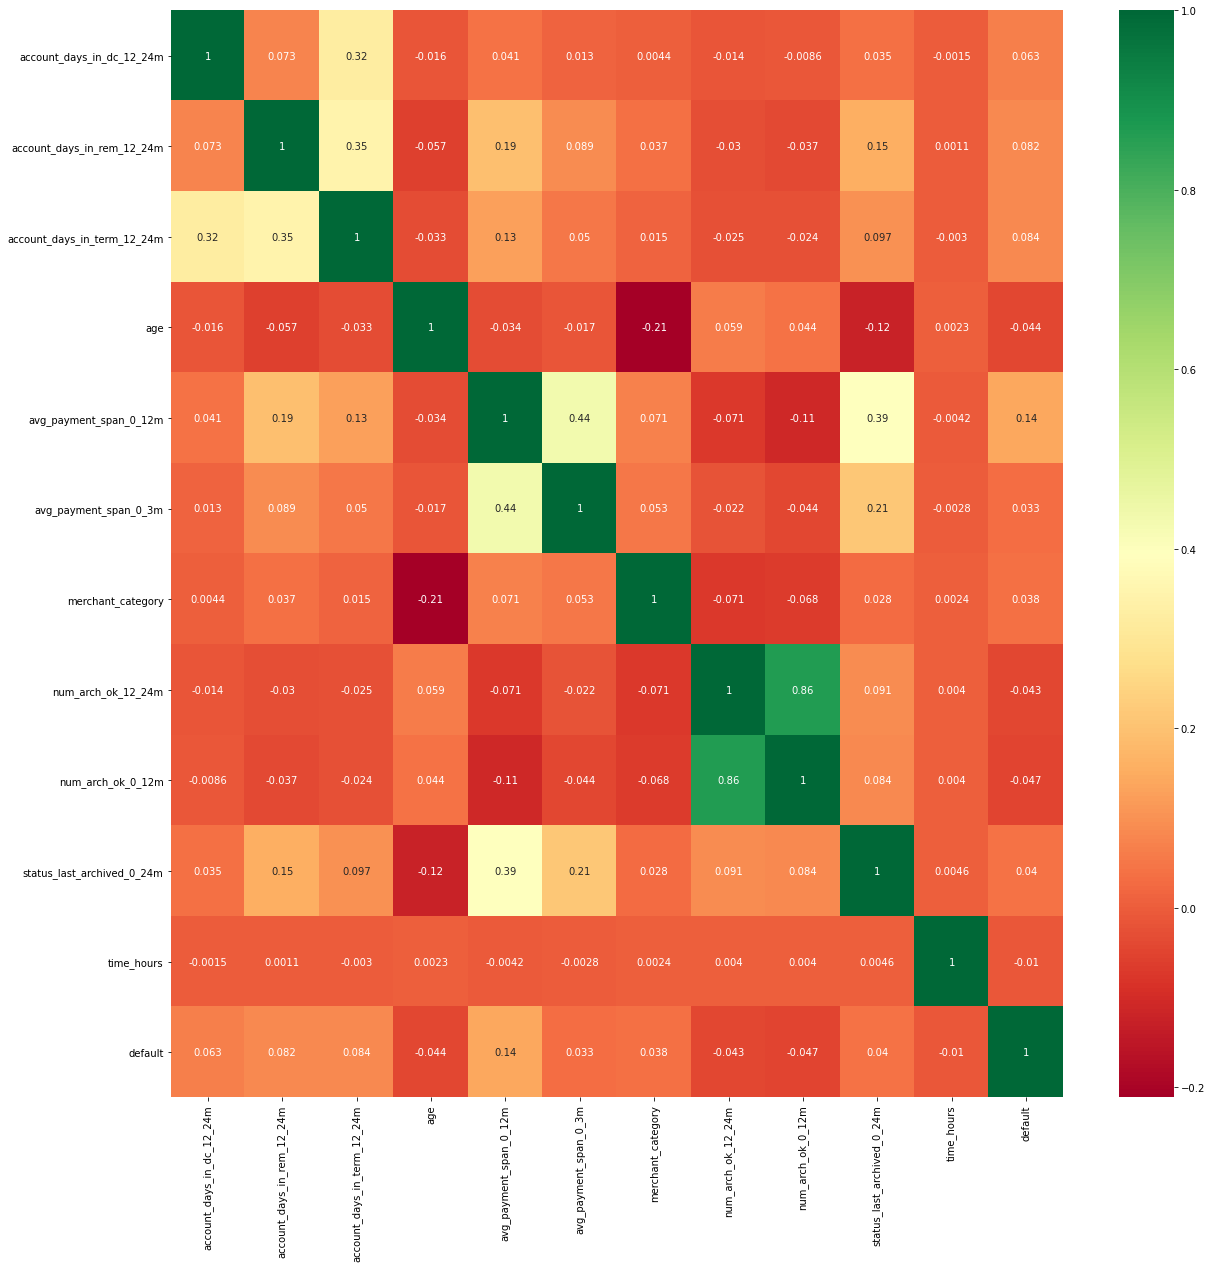

In [47]:
selected_feat = ["account_days_in_dc_12_24m" ,"account_days_in_rem_12_24m",
                 "account_days_in_term_12_24m", "age", "avg_payment_span_0_12m", "avg_payment_span_0_3m", 
                 "merchant_category", "num_arch_ok_12_24m", "num_arch_ok_0_12m","status_last_archived_0_24m",
                 "time_hours","default"]
df_selected_feat = train_df_prep[selected_feat]
#get correlations of each features in dataset
corrmat = df_selected_feat.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_selected_feat[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [56]:
train_df_prep = pd.read_csv("/Users/andreatamburri/Documents/GitHub/Default-predictor/prep_dataset.csv", delimiter = ";")
x_train_df_prep = train_df_prep.drop(["default","uuid"],axis=1)
y_train_df_prep = train_df_prep[["default"]]
test_df_prep = pd.read_csv("/Users/andreatamburri/Documents/GitHub/Default-predictor/prep_dataset_test.csv", delimiter = ";")
x_test_df_prep = test_df_prep.drop(["default","uuid"],axis=1)
y_test_df_prep = test_df_prep[["default"]]

       account_amount_added_12_24m  account_days_in_dc_12_24m  \
0                              0.0                   0.000000   
1                              0.0                   0.000000   
2                              0.0                   0.000000   
3                              0.0                   0.217333   
4                              0.0                   0.000000   
...                            ...                        ...   
89971                          0.0                   0.000000   
89972                          0.0                   0.000000   
89973                          0.0                   0.000000   
89974                          0.0                   0.000000   
89975                          0.0                   0.217333   

       account_days_in_rem_12_24m  account_days_in_term_12_24m  \
0                         0.00000                     0.000000   
1                         0.00000                     0.000000   
2                    

In [108]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def test(model, x_test, y_test, return_score=True):
        # predict crisp classes for test set
        yhat_classes =model.predict(x_test)
        acc = round(accuracy_score(y_test, yhat_classes), 4) * 100
        precision = round(precision_score(y_test, yhat_classes, average='weighted'), 4) * 100
        recall = round(recall_score(y_test, yhat_classes, average='weighted'), 4) * 100
        f1 = round(f1_score(y_test, yhat_classes), 4) * 100
        # area under roc curve
        auroc = round(roc_auc_score(y_test, yhat_classes), 4) * 100
        tn, fp, fn, tp = confusion_matrix(y_test, yhat_classes).ravel()
        confusion_matrix_abs_nums = {"FP": fp, "FN": fn, "TN": tn, "TP": tp}

        score = {
            "Accuracy %": acc,
            "Precision %": precision,
            "Recall %": recall,
            "F1-Score %": f1,
            "AUROC %": auroc,
            "ConfusionMatrixCounts": confusion_matrix_abs_nums
        }
        if return_score:
            return score
        else:
            print("Scores on test data: " + score)



logistic_config = dict(
    solver = 'lbfgs',
    verbose = 1,
    n_jobs = 4,
    class_weight = {0: 0.5, 1: 30}
)

x_train, x_val, y_train, y_val = train_test_split(x_train_df_prep,y_train_df_prep,test_size=0.2,
                                                  random_state=0,stratify=y_train_df_prep)

model = LogisticRegression(**logistic_config)
model.fit(
            x_train,
            y_train,
        )
val_accuracy = model.score(x_val, y_val)
test(model, x_val, y_val)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    9.8s finished


{'Accuracy %': 82.28,
 'Precision %': 98.17,
 'Recall %': 82.28,
 'F1-Score %': 10.5,
 'AUROC %': 77.45,
 'ConfusionMatrixCounts': {'FP': 3118, 'FN': 71, 'TN': 14620, 'TP': 187}}

In [98]:
#test model accuracy with importance scores

selected_feat = ["account_days_in_dc_12_24m" ,"account_days_in_rem_12_24m",
                 "account_days_in_term_12_24m", "age", "avg_payment_span_0_12m", "avg_payment_span_0_3m", 
                 "merchant_category", "num_arch_ok_12_24m", "num_arch_ok_0_12m","status_last_archived_0_24m",
                 "time_hours"]
x_train_df_importance = x_train_df_prep[selected_feat]
x_train, x_val, y_train, y_val = train_test_split(x_train_df_importance,y_train_df_prep,test_size=0.2,
                                                  random_state=0,stratify=y_train_df_prep)

model_importance = LogisticRegression(**logistic_config)
model_importance.fit(
            x_train,
            y_train,
        )
val_accuracy = model_importance.score(x_val, y_val)
test(model_importance, x_val, y_val)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    1.6s finished


{'Accuracy %': 75.96000000000001,
 'Precision %': 98.19,
 'Recall %': 75.96000000000001,
 'F1-Score %': 8.35,
 'AUROC %': 76.16000000000001,
 'ConfusionMatrixCounts': {'FP': 4265, 'FN': 61, 'TN': 13473, 'TP': 197}}

In [73]:
import shap

# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(x_train, 15)

shap.initjs()

ex = shap.KernelExplainer(model.predict, X_train_summary)
shap_values = ex.shap_values(x_test_df_prep.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values, x_test_df_prep.iloc[0,:])

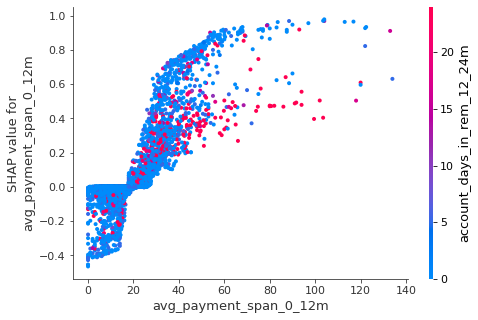

In [93]:
shap.dependence_plot('avg_payment_span_0_12m', shap_values, x_test_df_prep, interaction_index="account_days_in_rem_12_24m")

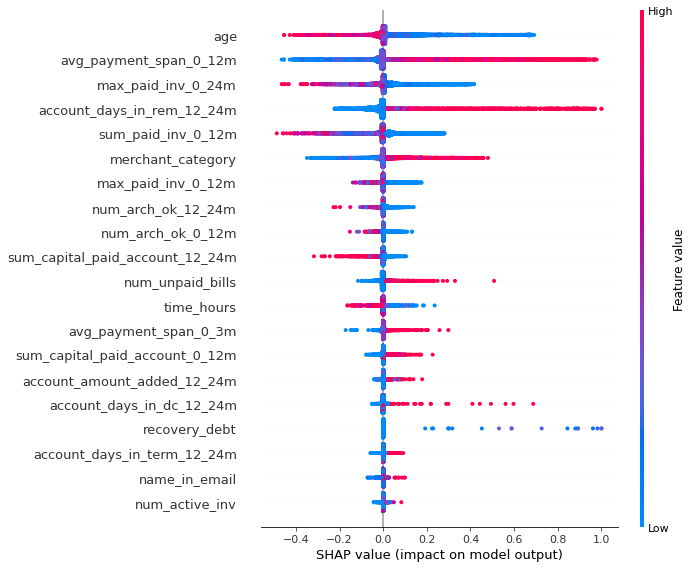

In [75]:
shap_values = ex.shap_values(x_test_df_prep)
shap.summary_plot(shap_values, x_test_df_prep)

In [99]:
#test shap features
selected_features_shap = ["max_paid_inv_0_24m","age", "avg_payment_span_0_12m", "sum_paid_inv_0_12m",
                          "max_paid_inv_0_12m","sum_capital_paid_account_12_24m",
                 "merchant_category", "num_arch_ok_12_24m", "num_arch_ok_0_12m"]

x_train_df_shap = x_train_df_prep[selected_features_shap]
x_train, x_val, y_train, y_val = train_test_split(x_train_df_shap,y_train_df_prep,test_size=0.2,
                                                  random_state=0,stratify=y_train_df_prep)

model_shap = LogisticRegression(**logistic_config)
model_shap.fit(
            x_train,
            y_train,
        )
val_accuracy = model_shap.score(x_val, y_val)
test(model_shap, x_val, y_val)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    2.9s finished


{'Accuracy %': 74.95,
 'Precision %': 98.19,
 'Recall %': 74.95,
 'F1-Score %': 8.110000000000001,
 'AUROC %': 76.03,
 'ConfusionMatrixCounts': {'FP': 4449, 'FN': 59, 'TN': 13289, 'TP': 199}}

In [110]:
#permutation feature importance
from sklearn.inspection import permutation_importance

r = permutation_importance(model, x_val, y_val,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{x_train_df_prep.columns[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

age     0.010 +/- 0.001
account_days_in_rem_12_24m0.004 +/- 0.001
num_unpaid_bills0.002 +/- 0.001
sum_capital_paid_account_0_12m0.001 +/- 0.000
recovery_debt0.001 +/- 0.000
account_days_in_term_12_24m0.000 +/- 0.000


In [113]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(x_val, y_val)
eli5.show_weights(perm, feature_names = x_val.columns.tolist(), top=41)

Weight,Feature
0.0087 ± 0.0038,age
0.0042 ± 0.0026,account_days_in_rem_12_24m
0.0026 ± 0.0008,num_unpaid_bills
0.0017 ± 0.0005,sum_capital_paid_account_0_12m
0.0007 ± 0.0003,recovery_debt
0.0005 ± 0.0003,account_amount_added_12_24m
0.0003 ± 0.0002,num_active_inv
0.0003 ± 0.0003,account_days_in_term_12_24m
0.0002 ± 0.0002,account_days_in_dc_12_24m
0.0001 ± 0.0009,time_hours


In [115]:
#test model accuracy with importance permutation

selected_feat_perm = ["account_days_in_dc_12_24m" ,"account_days_in_rem_12_24m", "num_unpaid_bills",
                 "sum_capital_paid_account_0_12m", "recovery_debt", "num_active_inv", "account_amount_added_12_24m",
                 "account_days_in_term_12_24m", "age", "avg_payment_span_0_12m", 
                 "time_hours"]
x_train_df_perm = x_train_df_prep[selected_feat_perm]
x_train, x_val, y_train, y_val = train_test_split(x_train_df_perm,y_train_df_prep,test_size=0.2,
                                                  random_state=0,stratify=y_train_df_prep)

model_perm = LogisticRegression(**logistic_config)
model_perm.fit(
            x_train,
            y_train,
        )
val_accuracy = model_perm.score(x_val, y_val)
test(model_perm, x_val, y_val)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    4.7s finished


{'Accuracy %': 84.74000000000001,
 'Precision %': 97.78999999999999,
 'Recall %': 84.74000000000001,
 'F1-Score %': 8.459999999999999,
 'AUROC %': 67.24,
 'ConfusionMatrixCounts': {'FP': 2616, 'FN': 131, 'TN': 15122, 'TP': 127}}

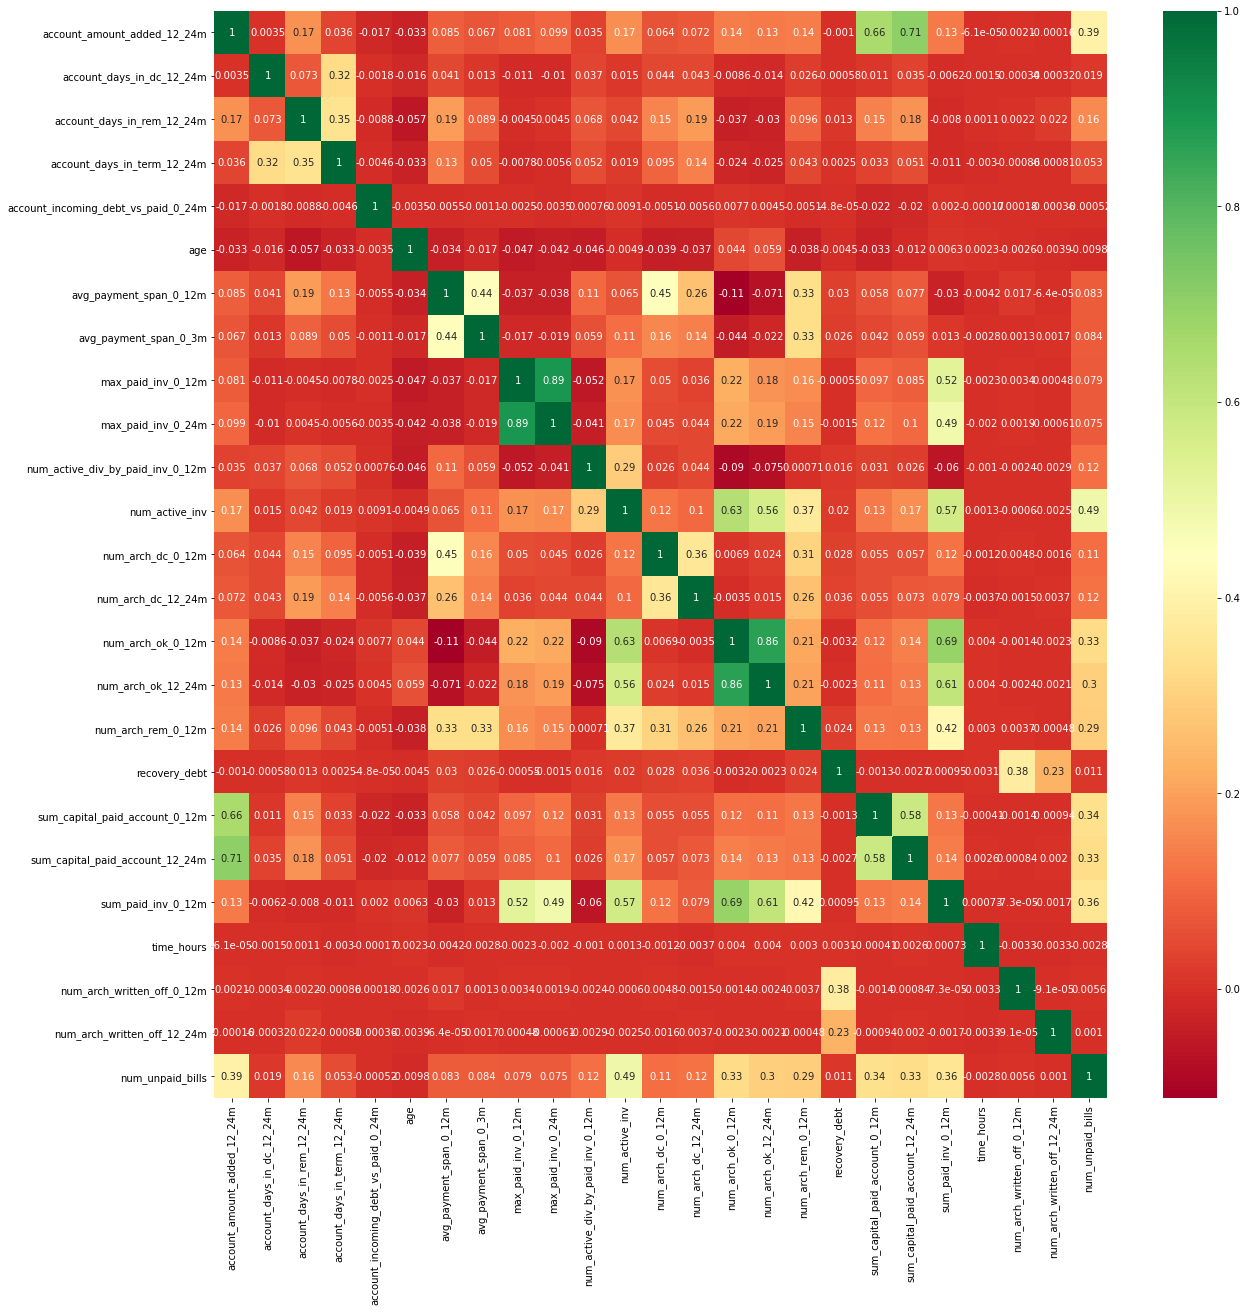

In [120]:
#filter based feature selection

#correlation of numeric variables
numeric_features = ["account_amount_added_12_24m","account_days_in_dc_12_24m","account_days_in_rem_12_24m",
                    "account_days_in_term_12_24m","account_incoming_debt_vs_paid_0_24m","age","avg_payment_span_0_12m",
                    "avg_payment_span_0_3m","max_paid_inv_0_12m","max_paid_inv_0_24m",
                    "num_active_div_by_paid_inv_0_12m","num_active_inv","num_arch_dc_0_12m",
            "num_arch_dc_12_24m","num_arch_ok_0_12m","num_arch_ok_12_24m","num_arch_rem_0_12m","recovery_debt",
                    "sum_capital_paid_account_0_12m","sum_capital_paid_account_12_24m","sum_paid_inv_0_12m",
                    "time_hours","num_arch_written_off_0_12m","num_arch_written_off_12_24m","num_unpaid_bills"]

df_numeric_feat = train_df_prep.drop(["uuid"],axis=1)[numeric_features]
#get correlations of each features in dataset
corrmat = df_numeric_feat.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_numeric_feat.corr(),annot=True,cmap="RdYlGn")



In [149]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_numeric_feat, 7))

'''to delete max_paid_inv_0_24m, num_arch_ok_12_24m, sum_capital_paid_account_12_24m,
sum_paid_inv_0_12m'''

numeric_features_v2 = ["account_amount_added_12_24m","account_days_in_dc_12_24m","account_days_in_rem_12_24m",
                    "account_days_in_term_12_24m","account_incoming_debt_vs_paid_0_24m","age","avg_payment_span_0_12m",
                    "avg_payment_span_0_3m","max_paid_inv_0_12m",
                    "num_active_div_by_paid_inv_0_12m","num_active_inv","num_arch_dc_0_12m",
            "num_arch_dc_12_24m","num_arch_ok_0_12m","num_arch_rem_0_12m","recovery_debt",
                    "time_hours","num_arch_written_off_0_12m","num_arch_written_off_12_24m","num_unpaid_bills"]
print("Top Absolute Correlations after correction")
print(get_top_abs_correlations(df_numeric_feat[numeric_features_v2], 7))

Top Absolute Correlations
max_paid_inv_0_12m           max_paid_inv_0_24m                 0.889912
num_arch_ok_0_12m            num_arch_ok_12_24m                 0.864148
account_amount_added_12_24m  sum_capital_paid_account_12_24m    0.706692
num_arch_ok_0_12m            sum_paid_inv_0_12m                 0.688981
account_amount_added_12_24m  sum_capital_paid_account_0_12m     0.655395
num_active_inv               num_arch_ok_0_12m                  0.632183
num_arch_ok_12_24m           sum_paid_inv_0_12m                 0.609218
dtype: float64
Top Absolute Correlations after correction
num_active_inv               num_arch_ok_0_12m             0.632183
                             num_unpaid_bills              0.490319
avg_payment_span_0_12m       num_arch_dc_0_12m             0.451727
                             avg_payment_span_0_3m         0.436494
account_amount_added_12_24m  num_unpaid_bills              0.394305
recovery_debt                num_arch_written_off_0_12m    0.3830

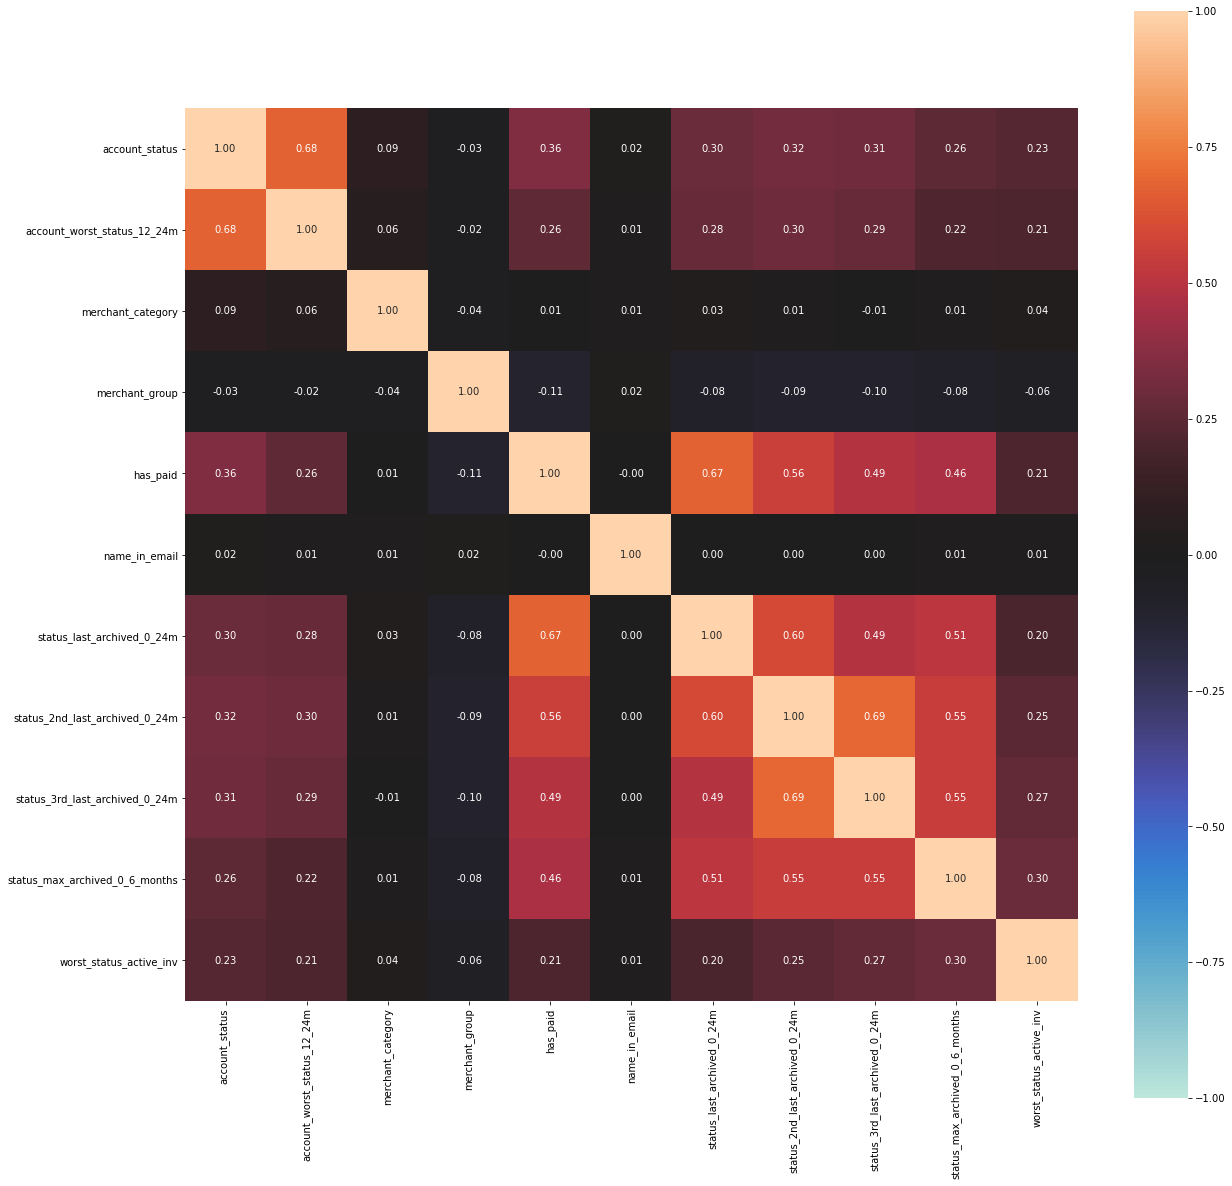

{'corr':                                 account_status  account_worst_status_12_24m  \
 account_status                        1.000000                     0.677426   
 account_worst_status_12_24m           0.677426                     1.000000   
 merchant_category                     0.093637                     0.055679   
 merchant_group                       -0.030813                    -0.017541   
 has_paid                              0.357308                     0.260854   
 name_in_email                         0.017940                     0.014933   
 status_last_archived_0_24m            0.296518                     0.283504   
 status_2nd_last_archived_0_24m        0.316649                     0.299723   
 status_3rd_last_archived_0_24m        0.309026                     0.288164   
 status_max_archived_0_6_months        0.255413                     0.218400   
 worst_status_active_inv               0.231936                     0.208752   
 
                              

In [139]:
'''Theil’s U, also referred to as the Uncertainty Coefficient, 
is based on the conditional entropy between x and y — or in human language, 
given the value of x, how many possible states does y have, and how often do they occur.
Just like Cramer’s V, the output value is on the range of [0,1], with the same interpretations as before
— but unlike Cramer’s V, it is asymmetric, meaning U(x,y)≠U(y,x) (while V(x,y)=V(y,x), where V is Cramer’s V).
Using Theil’s U in the simple case above will let us find out that knowing y means we know x, but not vice-versa.
'''

#correlation of categorical variables
cat_features = ["account_status",
            "account_worst_status_0_3m","account_worst_status_12_24m","account_worst_status_3_6m",
            "account_worst_status_6_12m",
            "merchant_category","merchant_group","has_paid",
            "name_in_email",
            "status_last_archived_0_24m","status_2nd_last_archived_0_24m","status_3rd_last_archived_0_24m",
            "status_max_archived_0_6_months","status_max_archived_0_12_months","status_max_archived_0_24_months",
             "worst_status_active_inv"]
df_cat_feat = train_df_prep.drop(["uuid"],axis=1)[cat_features]

#after first iteration
cat_featuresv2 = ["account_status",
            "account_worst_status_12_24m",
            "merchant_category","merchant_group","has_paid",
            "name_in_email",
            "status_last_archived_0_24m","status_2nd_last_archived_0_24m","status_3rd_last_archived_0_24m",
            "status_max_archived_0_6_months",
             "worst_status_active_inv"]

#dython implementation, using Theil's U, for cat-cat variables
from dython.nominal import associations
associations(df_cat_feat[cat_featuresv2],nom_nom_assoc='theil', figsize=(20, 20))
    




['account_amount_added_12_24m', 'account_days_in_dc_12_24m', 'account_days_in_rem_12_24m', 'account_days_in_term_12_24m', 'account_incoming_debt_vs_paid_0_24m', 'age', 'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'max_paid_inv_0_12m', 'num_active_div_by_paid_inv_0_12m', 'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m', 'num_arch_rem_0_12m', 'recovery_debt', 'time_hours', 'num_arch_written_off_0_12m', 'num_arch_written_off_12_24m', 'num_unpaid_bills', 'account_status', 'account_worst_status_12_24m', 'merchant_category', 'merchant_group', 'has_paid', 'name_in_email', 'status_last_archived_0_24m', 'status_2nd_last_archived_0_24m', 'status_3rd_last_archived_0_24m', 'status_max_archived_0_6_months', 'worst_status_active_inv']


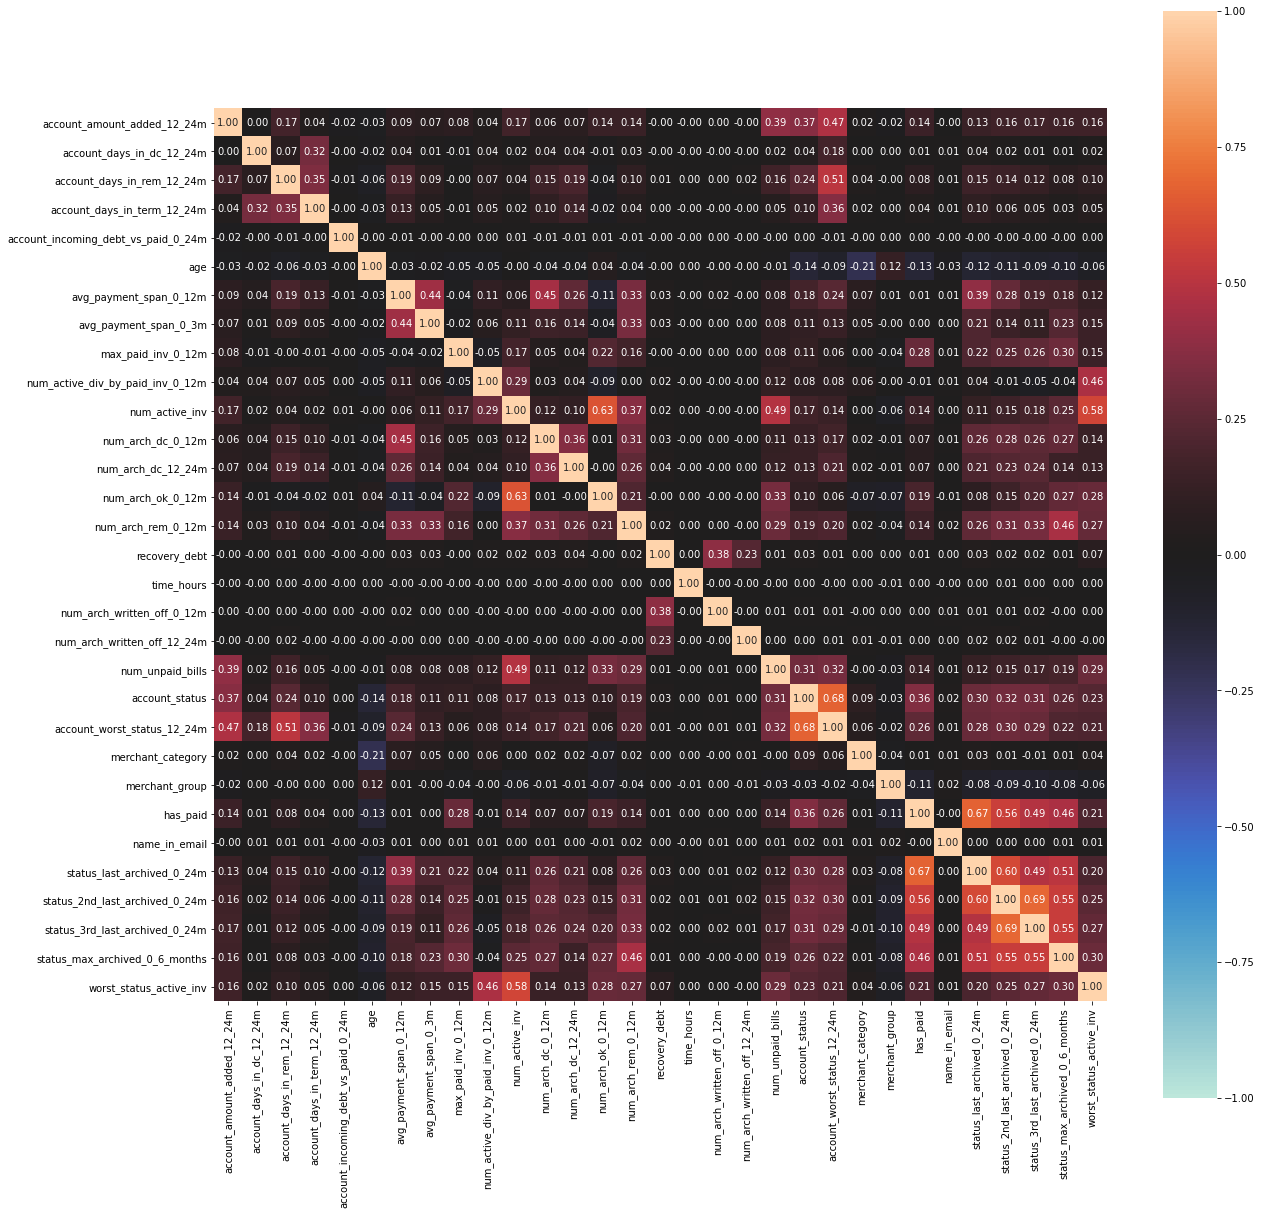

{'corr':                                      account_amount_added_12_24m  \
 account_amount_added_12_24m                             1.000000   
 account_days_in_dc_12_24m                               0.003466   
 account_days_in_rem_12_24m                              0.174531   
 account_days_in_term_12_24m                             0.036492   
 account_incoming_debt_vs_paid_0_24m                    -0.016801   
 age                                                    -0.032813   
 avg_payment_span_0_12m                                  0.085222   
 avg_payment_span_0_3m                                   0.067036   
 max_paid_inv_0_12m                                      0.080874   
 num_active_div_by_paid_inv_0_12m                        0.035273   
 num_active_inv                                          0.167798   
 num_arch_dc_0_12m                                       0.064250   
 num_arch_dc_12_24m                                      0.071966   
 num_arch_ok_0_12m        

In [153]:
#all features
"""
Calculates the Correlation Ratio (sometimes marked by the greek letter Eta)
    for categorical-continuous association.
    Mathematically, it is defined as the weighted variance of the mean of each category divided by the variance of all samples; in human language, the Correlation Ratio answers the following question: Given a continuous number, how well can you know to which category it belongs to?"""

all_features = numeric_features_v2 + cat_featuresv2
df_feat = train_df_prep.drop(["uuid"],axis=1)[all_features]
associations(df_feat,nom_nom_assoc='correlation_ratio', figsize=(20, 20))

#no more collinearity detected

In [171]:
#filter-based, on ANOVA, for numeric feat and categorical output
#the number of features selected was based taking the first 10 comparing the two results below
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2

selected_columns = []
x_feat_df = x_train_df_prep[numeric_features_v2]
#feature selection using f_classif
fs = SelectKBest(score_func=f_classif, k=7)
fit = fs.fit(x_feat_df,y_train_df_prep)
#create df for scores
dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(x_feat_df.columns)

#concat two dataframes for better visualization 
featureScores_numeric = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores_numeric.columns = ['Selected_columns','Score_ANOVA'] 
#print 10 best features
print(featureScores_numeric.nlargest(7,'Score_ANOVA'))  

#cat input - cat output, via chi-squared
x_feat_df = x_train_df_prep[cat_featuresv2]
#feature selection using f_classif
fs = SelectKBest(score_func=chi2, k=3)
fit = fs.fit(x_feat_df,y_train_df_prep)
#create df for scores
dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(x_feat_df.columns)

#concat two dataframes for better visualization 
featureScores_cat = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores_cat.columns = ['Selected_columns','Score_CHI2'] 
#print 10 best features
print(featureScores_cat.nlargest(3,'Score_CHI2')) 

selected_columns = featureScores_cat["Selected_columns"].tolist() + featureScores_numeric["Selected_columns"].tolist()

print(selected_columns)

                    Selected_columns  Score_ANOVA
6             avg_payment_span_0_12m  1869.929797
11                 num_arch_dc_0_12m  1047.884646
9   num_active_div_by_paid_inv_0_12m   957.225014
12                num_arch_dc_12_24m   925.261728
3        account_days_in_term_12_24m   633.863199
2         account_days_in_rem_12_24m   615.892074
1          account_days_in_dc_12_24m   360.388491
              Selected_columns   Score_CHI2
2            merchant_category  1268.490641
1  account_worst_status_12_24m   464.341844
0               account_status   265.249118
['account_status', 'account_worst_status_12_24m', 'merchant_category', 'merchant_group', 'has_paid', 'name_in_email', 'status_last_archived_0_24m', 'status_2nd_last_archived_0_24m', 'status_3rd_last_archived_0_24m', 'status_max_archived_0_6_months', 'worst_status_active_inv', 'account_amount_added_12_24m', 'account_days_in_dc_12_24m', 'account_days_in_rem_12_24m', 'account_days_in_term_12_24m', 'account_incoming_debt_vs_

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [173]:
#test with filter based method

x_train_df_filter = x_train_df_prep[selected_columns]
x_train, x_val, y_train, y_val = train_test_split(x_train_df_filter,y_train_df_prep,test_size=0.2,
                                                  random_state=0,stratify=y_train_df_prep)

model_perm = LogisticRegression(**logistic_config)
model_perm.fit(
            x_train,
            y_train,
        )
val_accuracy = model_perm.score(x_val, y_val)
test(model_perm, x_val, y_val)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    8.7s finished


{'Accuracy %': 76.92,
 'Precision %': 98.18,
 'Recall %': 76.92,
 'F1-Score %': 8.58,
 'AUROC %': 76.25999999999999,
 'ConfusionMatrixCounts': {'FP': 4091, 'FN': 63, 'TN': 13647, 'TP': 195}}

In [181]:
#see the most used feature ww and use in a final one
from collections import Counter

all_features_selected = selected_feat + selected_features_shap + selected_feat_perm + selected_columns
#print(Counter(all_features_selected).most_common(10))

#let's take the ones at least three times selected
best_selected_features = [feat for feat, count in Counter(all_features_selected).most_common(8)]
print(best_selected_features)

x_train_df_best = x_train_df_prep[best_selected_features]
x_train, x_val, y_train, y_val = train_test_split(x_train_df_best,y_train_df_prep,test_size=0.2,
                                                  random_state=0,stratify=y_train_df_prep)

model_perm = LogisticRegression(**logistic_config)
model_perm.fit(
            x_train,
            y_train,
        )
val_accuracy = model_perm.score(x_val, y_val)
test(model_perm, x_val, y_val)

#we obtained -1.8% in AUROC with only 8 features vs 41

['age', 'avg_payment_span_0_12m', 'account_days_in_dc_12_24m', 'account_days_in_rem_12_24m', 'account_days_in_term_12_24m', 'merchant_category', 'num_arch_ok_0_12m', 'time_hours']


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    3.6s finished


{'Accuracy %': 76.58,
 'Precision %': 98.16,
 'Recall %': 76.58,
 'F1-Score %': 8.39,
 'AUROC %': 75.71,
 'ConfusionMatrixCounts': {'FP': 4150, 'FN': 65, 'TN': 13588, 'TP': 193}}

In [191]:
#PD plot of the most important 5/6 features, using best model and 8 features
import shap

# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(x_train, 15)

shap.initjs()

ex = shap.KernelExplainer(model_perm.predict, X_train_summary)
shap_values = ex.shap_values(x_train_df_best.iloc[9,:])
shap.force_plot(ex.expected_value, shap_values, x_train_df_best.iloc[9,:])

In [195]:
shap_values = ex.shap_values(x_train_df_best)


ValueError: Could not find feature named: avg_payment_span_0_12m 

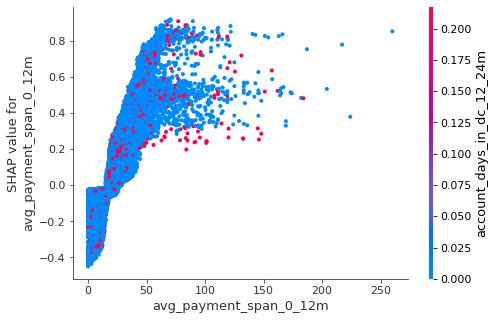

In [196]:
shap.dependence_plot("avg_payment_span_0_12m", shap_values, x_train_df_best, interaction_index="account_days_in_dc_12_24m")

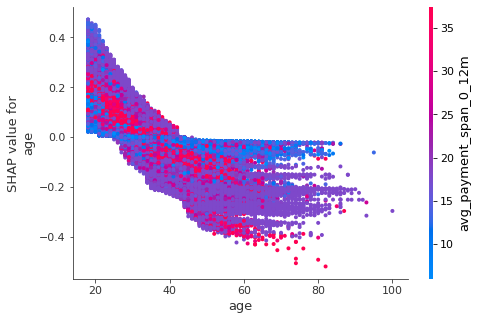

In [197]:
shap.dependence_plot("age", shap_values, x_train_df_best, interaction_index="avg_payment_span_0_12m")

In [104]:
#TODO
#check local-interpretability with shap
#code cleanup and put some nice explanations
#business logic on the final model explanation
#update README

,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,account_worst_status_3_6m,account_worst_status_6_12m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,0.0,0.0,0.0,0.0,0.009135,1.0,1.0,0.0,1.0,1.0,...,1,1,1,1,0.0,8815.0,0.0,27157.0,19.895556,0.0
1,0.0,0.0,0.0,0.0,1.330536,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.236667,0.0
2,50956.0,0.0,77.0,0.0,0.000000,1.0,1.0,2.0,3.0,2.0,...,2,1,1,3,0.0,36163.0,39846.0,93760.0,20.332778,0.0
3,35054.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,...,0,2,2,2,0.0,62585.0,0.0,1790.0,6.201111,0.0
4,0.0,0.0,0.0,0.0,0.000000,1.0,2.0,0.0,2.0,2.0,...,0,0,0,0,0.0,14295.0,0.0,0.0,8.451111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,1.330536,1.0,1.0,0.0,0.0,0.0,...,1,1,1,1,0.0,0.0,0.0,60127.0,10.765556,0.0
9996,0.0,0.0,0.0,0.0,0.004044,1.0,1.0,0.0,1.0,1.0,...,1,0,1,1,0.0,7948.0,0.0,4740.0,21.708333,0.0
9997,45671.0,0.0,20.0,0.0,0.705078,2.0,2.0,2.0,1.0,1.0,...,0,0,0,0,0.0,17447.0,19627.0,3100.0,2.185278,0.0
9998,56102.0,0.0,0.0,0.0,0.064175,1.0,2.0,1.0,2.0,2.0,...,1,1,1,1,0.0,18339.0,56180.0,34785.0,9.725278,0.0
